![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [3]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!

In [4]:
md = pd.read_csv('netflix_data.csv')
md.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [7]:
# Dropping rows where type is 'TV Show'
# Dropping columns -- show_id, title, cast, description, 
md = md[md['type'] != 'TV Show']
md.drop(columns = ['show_id','title','cast','description'], inplace=True)
md.head(50)

,type,director,country,date_added,release_year,duration,genre
1,Movie,Jorge Michel Grau,Mexico,"December 23, 2016",2016,93,Dramas
2,Movie,Gilbert Chan,Singapore,"December 20, 2018",2011,78,Horror Movies
3,Movie,Shane Acker,United States,"November 16, 2017",2009,80,Action
4,Movie,Robert Luketic,United States,"January 1, 2020",2008,123,Dramas
6,Movie,Yasir Al Yasiri,Egypt,"June 1, 2020",2019,95,Horror Movies
7,Movie,Kevin Reynolds,United States,"November 1, 2019",1997,119,Dramas
8,Movie,Shravan Kumar,India,"April 1, 2019",2019,118,Horror Movies
9,Movie,Vikram Bhatt,India,"December 15, 2017",2008,143,Horror Movies
10,Movie,Zak Hilditch,United States,"October 20, 2017",2017,103,Dramas
13,Movie,Nottapon Boonprakob,Thailand,"March 1, 2019",2018,89,Documentaries


In [8]:
# Counting null entities in every column
md.isnull().sum()

type              0
director        163
country         230
date_added        0
release_year      0
duration          0
genre             0
dtype: int64

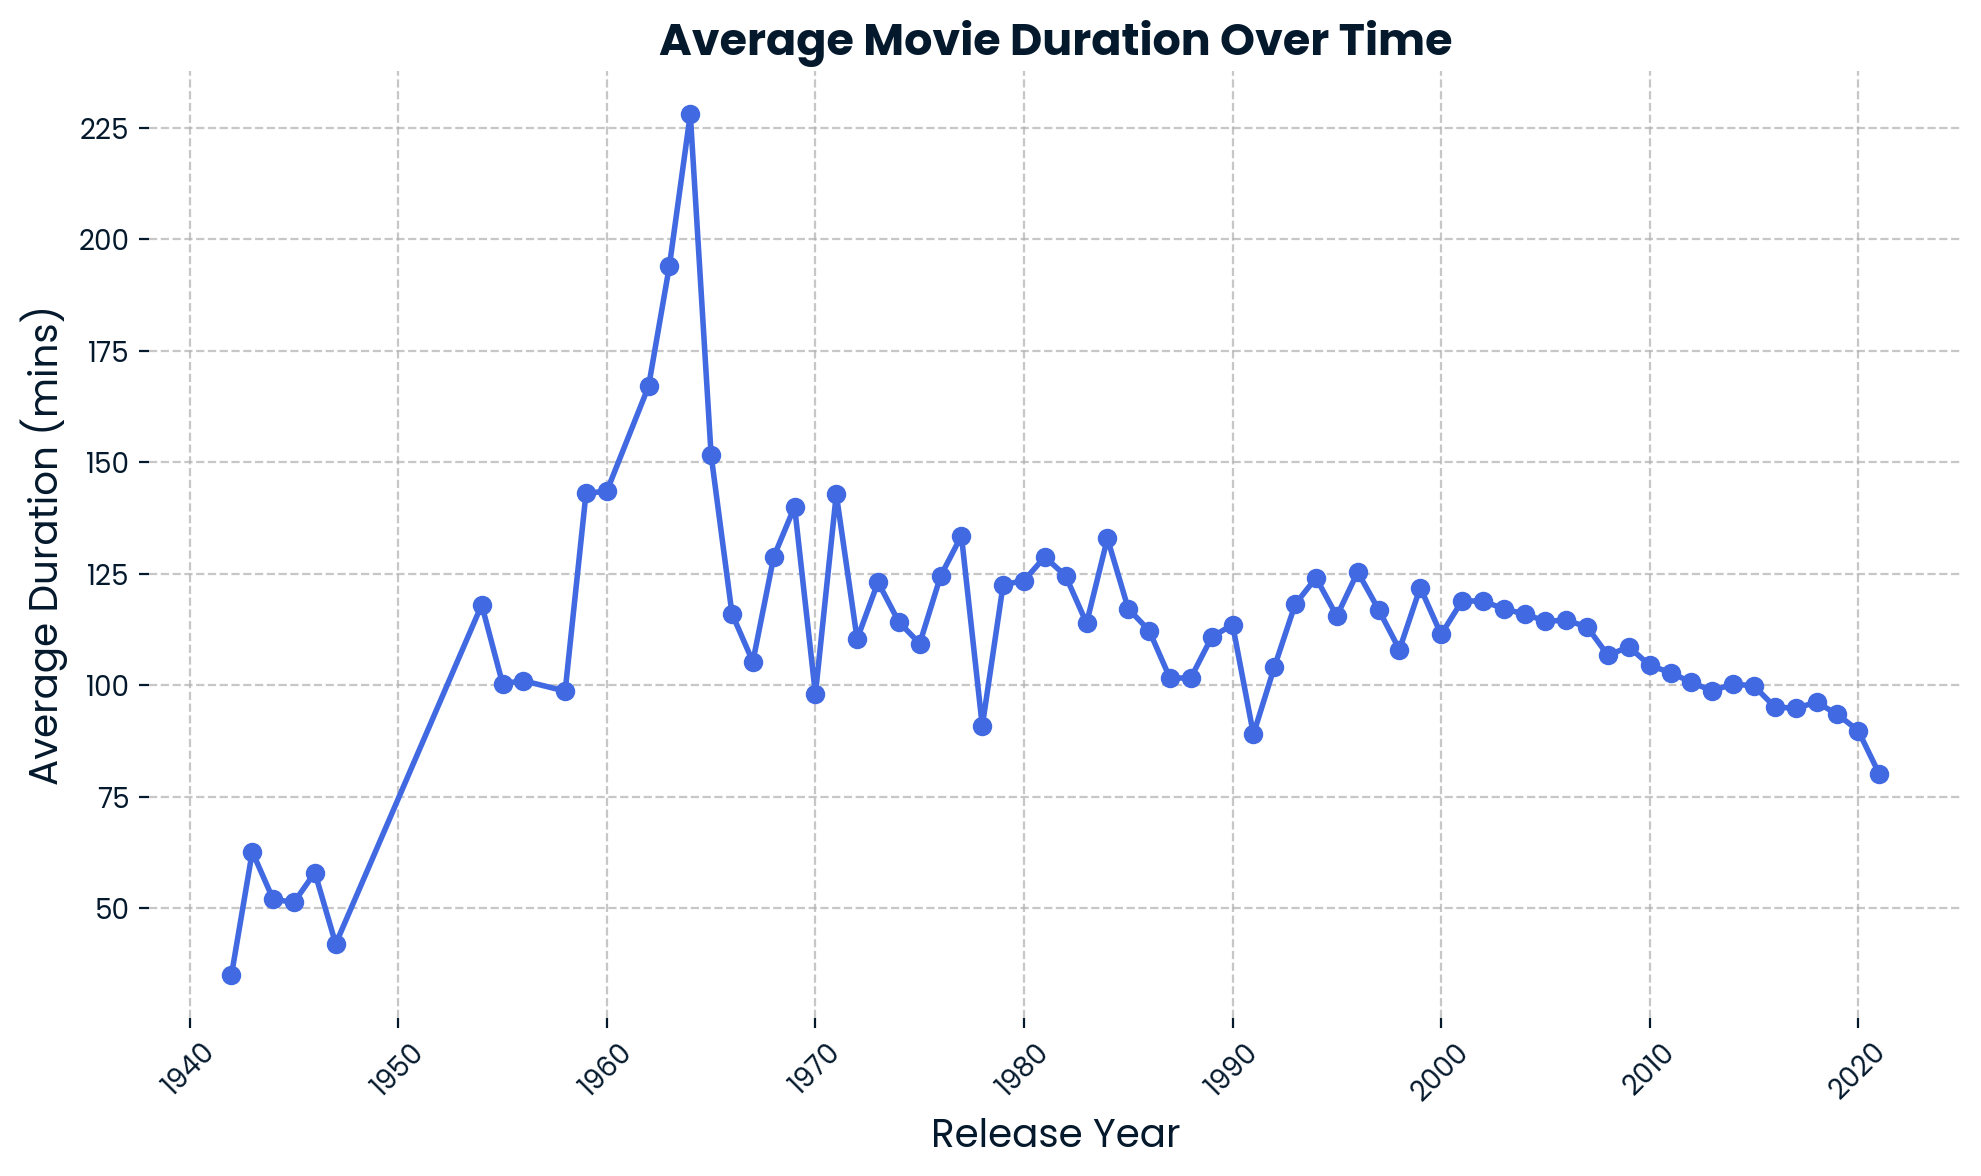

In [9]:
# Plotting a line graph of release_year and duration
md['release_year'] = pd.to_numeric(md['release_year'], errors='coerce')
md['duration'] = pd.to_numeric(md['duration'], errors='coerce')
avg_duration_per_year = md.groupby('release_year')['duration'].mean().dropna()

plt.figure(figsize=(10,6))
plt.plot(avg_duration_per_year.index, avg_duration_per_year.values, marker='o', linestyle='-', color='royalblue', linewidth=2)
# Customize the plot
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Average Duration (mins)', fontsize=14)
plt.title('Average Movie Duration Over Time', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.box(False)
plt.tight_layout()
plt.show()

In [10]:
md['genre'] = md['genre'].str.split(',')
md = md.explode('genre')
md['genre'] = md['genre'].str.strip()
genre_duration_sum = md.groupby('genre')['duration'].sum()
genre_duration_sum = genre_duration_sum.sort_values(ascending = False)
print(genre_duration_sum)

genre
Dramas                  154726
Comedies                115133
Action                   81677
Documentaries            61493
Children                 39200
Horror Movies            23766
Stand-Up                 21382
International Movies     12479
Classic Movies            8657
Thrillers                 4765
Uncategorized             2573
Independent Movies        1974
Anime Features            1774
Music                     1549
Cult Movies               1206
Sci-Fi                    1189
Romantic Movies            250
LGBTQ Movies                99
Sports Movies               87
Name: duration, dtype: int64


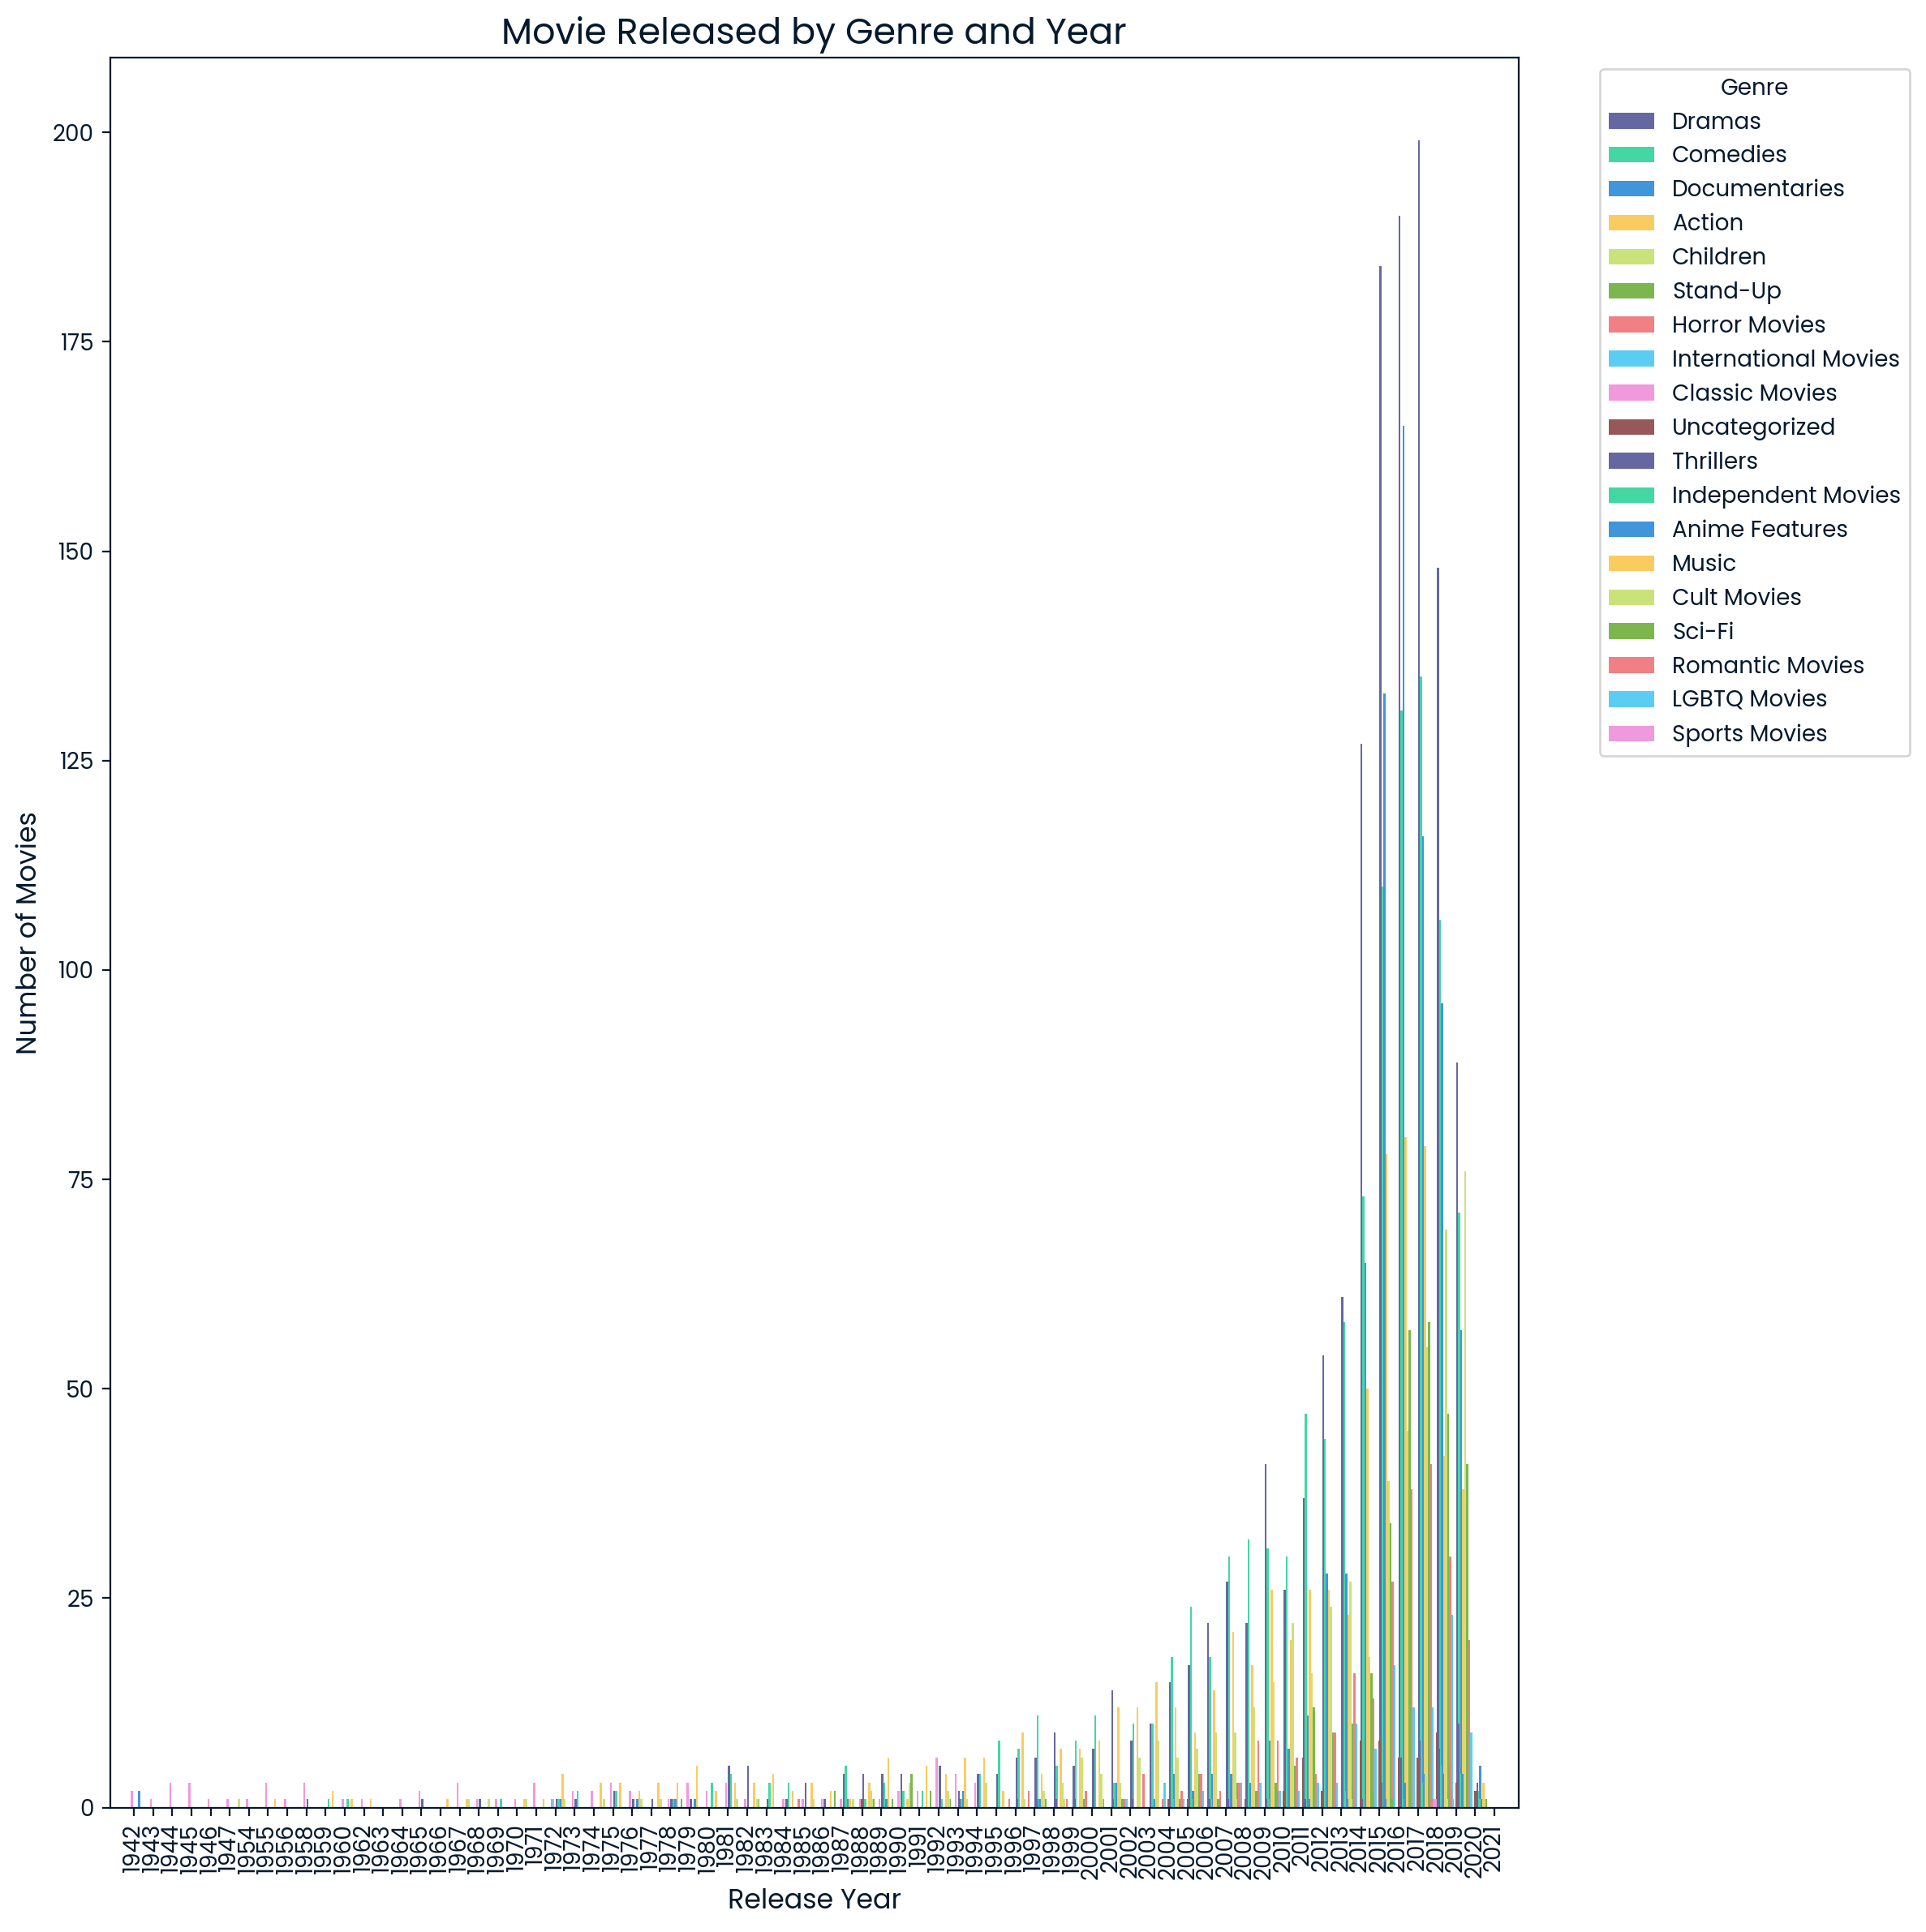

In [53]:
genre_by_year = md.groupby(['release_year','genre']).size().unstack(fill_value = 0)
plt.figure(figsize=(12,12))
top_genre = genre_by_year.sum().sort_values(ascending=False).head(19).index
genre_by_year[top_genre].plot(kind='bar', ax=plt.gca(), linewidth=2, width=2)
plt.title('Movie Released by Genre and Year',fontsize=16)
plt.xlabel('Release Year',fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.legend(title='Genre',bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()

In [12]:
genre_year_df = md.pivot_table(index='genre',columns='release_year',aggfunc='size', fill_value=0)
top_genre_by_year = genre_year_df.idxmax()
print(top_genre_by_year)

release_year
1942    Classic Movies
1943     Documentaries
1944    Classic Movies
1945    Classic Movies
1946    Classic Movies
             ...      
2017            Dramas
2018            Dramas
2019            Dramas
2020            Dramas
2021     Documentaries
Length: 72, dtype: object


Graphs_ Average Duration vs. Release Year_ and the other illustrating _Release Year vs. Number of Movies per Genre_, several important trends emerge:

## Graph 1: Average Duration vs. Release Year

- Between 1960 and 1970, there was a noticeable increase in the average duration of movies, reflecting a period where longer feature films gained popularity.
- However, after this peak, the average movie duration started to decline, indicating a shift towards shorter films in subsequent decades.

## Graph 2: Release Year vs. Number of Movies per Genre

- Drama has consistently been the most produced genre. Despite this, the data shows a sudden decline in the number of drama films released between 2020 and 2021, possibly impacted by the changing audience preferences to Anime Feautre genre.
- While Drama remained the dominant genre, followed by Comedies, Documentaries, and Action films, all four of these dominant genres experienced a sudden decline in 2020, coinciding with a surge in interest in Anime Feature.
- The Documentary genre has experienced steady growth, particularly from 2012-2013 onwards, suggesting an increasing interest in factual storytelling and real-world narratives.
- Comedies saw a consistent rise in production from 1995 to 2019, aligning with the growing demand for lighter, entertaining content during that period. Notably, Drama remained the dominant genre, followed by Comedies, Documentaries, and Action films.
- 
# Conclusion:
The analysis indicates that the overall decrease in movie length could be attributed to a _growing audience preference for more concise storytelling formats_. This trend coincides with the rise in **Anime Feature films**, a genre typically known for shorter runtimes compared to traditional live-action films. As more viewers shifted to anime, which often delivers impactful narratives within shorter durations, the overall average length of movies across genres decreased, reflecting a broader industry move toward brevity without sacrificing quality.